<a href="https://colab.research.google.com/github/israellmorais/RedesNeurais/blob/main/PerceptronMulticlasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron Multiclasse**

### Nome: Israel de Morais Madalena
### Disciplina: Redes Neurais Artificiais
### Prof.: Francisco de Assis Boldt

# Bibliotecas, funções comuns e 1ª função de custo

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import label_binarize
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer
from sklearn.base import BaseEstimator, ClassifierMixin


def geradataset(tamanho=20, centros=2):
    X, y = make_blobs(n_samples=tamanho, centers=centros, center_box=(0, 1.0), cluster_std=0.05)
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def plotahiperplano(vetor, bias=0, xmin=0, xmax=1):
    xs = np.linspace(xmin, xmax, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - bias / vetor[1]
    plt.plot(xs,ys)

class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(X.T, CustoPerceptron.erro(y, ypred))

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=CustoPerceptron(), alpha=0.001):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = alpha
        self.maxiter = 200
        self.custo = custo
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.labels = list(set(y))
        if len(self.labels) > 2:
            y = label_binarize(y, classes=self.labels)*2-1
            self.w = np.random.uniform(-1, 1, size=(Xb.shape[1], y.shape[1]))
        else:
            self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            a = self.preactivate(X)
            ypred = self.activation(a)
            custo = self.custo.custo(y, ypred)
            if custo == 0:
                break
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)
    
    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        if len(self.w.shape)  > 1:
            idx = np.argmax(a, axis=1)
            ypred = np.array([self.labels[i] for i in idx])
        else:
            ypred = self.activation(a)
        return ypred


## Base Aleatória com 4 características

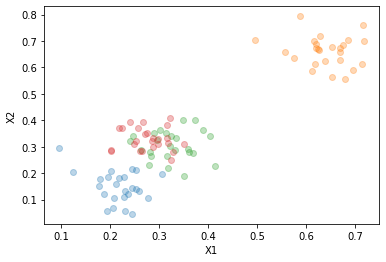

In [64]:
X, y = geradataset(100, 4)
plotadataset(X, y)
plt.show()

0.71
[[-0.09475906 -0.28830367  0.07359027 -0.48057496]
 [-0.15429653  0.78692683 -0.11671619  0.32401757]] [ 0.06010148 -0.24171173 -0.01540232  0.04096541]


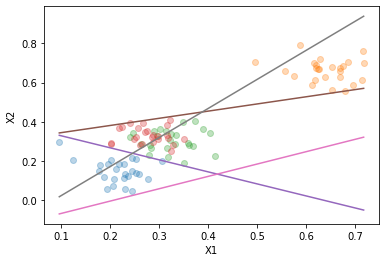

In [65]:
perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w[1:], perceptron.w[0])

plotadataset(X, y)
for i in range(len(set(y))):
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))

## Base Iris

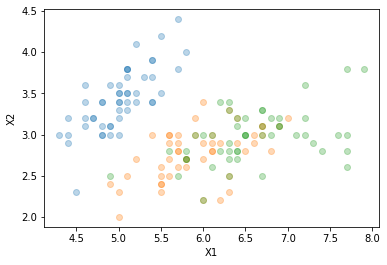

In [66]:
X, y = datasets.load_iris(return_X_y=True)

plotadataset(X, y)
plt.show()
ybin = label_binarize(y, classes=list(set(y)))*2-1

0.9466666666666667
[[ 0.56963272  0.14767056 -2.28105997]
 [ 0.262276   -1.63255653 -1.8424336 ]
 [-1.2581141   1.09580087  3.32642593]
 [-0.30480552 -1.47895049  2.33610638]] [-0.45397995  1.17110899 -0.87779642]


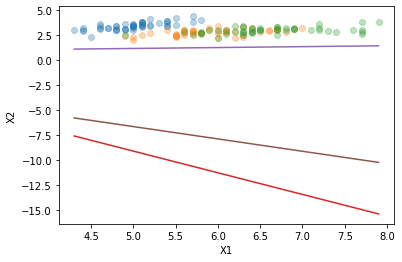

In [67]:
perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w[1:], perceptron.w[0])

plotadataset(X, y)
for i in range(len(set(y))):
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))

## Base aleatória com 2 características

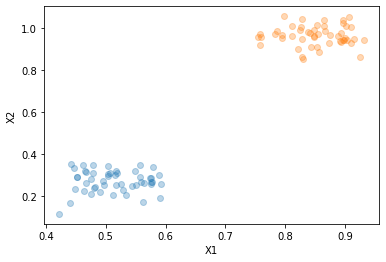

In [68]:
X, y = geradataset(100)

plotadataset(X, y)
plt.show()

0.5
[-0.02963001  0.07198174] -0.018515166832686544


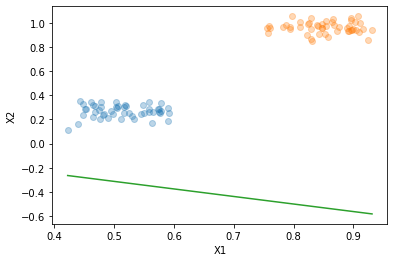

In [72]:
perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w[1:], perceptron.w[0])

plotadataset(X, y)

plotahiperplano(perceptron.w,0,min(X[:,0]), max(X[:,0]))


# 2ª Função de custo

In [73]:
class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return np.multiply(y, ypred)
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(X.T, CustoPerceptron.erro(y, ypred))


## Base Iris

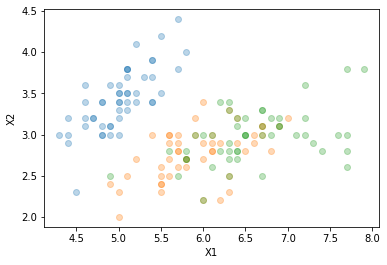

In [74]:
X, y = datasets.load_iris(return_X_y=True)

plotadataset(X, y)
plt.show()

0.6666666666666666
[[  6.69853924   0.06095975  -0.75454945]
 [ 13.53179435   0.27065438  -3.14248286]
 [-13.79474692   0.31678341  10.08605355]
 [ -6.30396613  -0.5575471    6.9854477 ]] [ 3.14733391  0.02410205 -1.42918545]


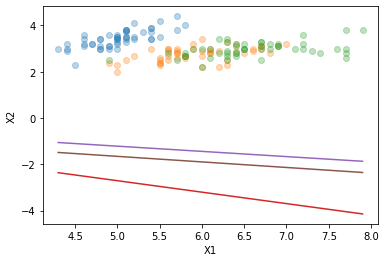

In [75]:
perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w[1:], perceptron.w[0])

plotadataset(X, y)
for i in range(len(set(y))):
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))

## Base aleatoria com 4 características

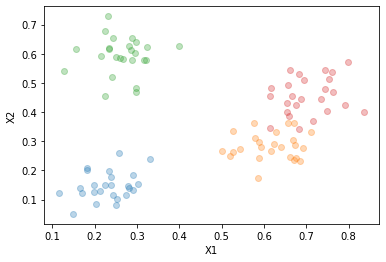

In [76]:
X, y = geradataset(100, 4)
plotadataset(X, y)
plt.show()

0.43
[[ 0.5442578   0.070414   -1.21520186  0.56178435]
 [ 0.91192981 -0.02181741  2.10114773  0.02024925]] [-0.72870017  0.01456448  0.07605254 -0.14749096]


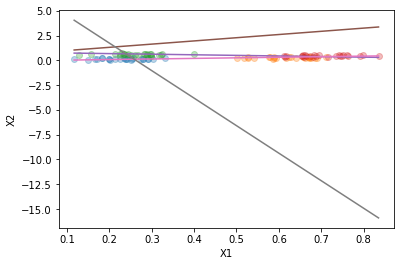

In [77]:
perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w[1:], perceptron.w[0])

plotadataset(X, y)
for i in range(len(set(y))):
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))